In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from matplotlib.cbook import boxplot_stats

base = pd.read_csv("drugmap_ready_for_analysis.csv")

In [2]:
base.rename(columns={"CS": "SMILES"}, inplace=True)
base.rename(columns={"HS": "Status"}, inplace=True)

In [59]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21396 entries, 0 to 21395
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      21396 non-null  object 
 1   DN      21396 non-null  object 
 2   Status  21396 non-null  object 
 3   SN      19946 non-null  object 
 4   CP      5278 non-null   object 
 5   TC      1557 non-null   object 
 6   DT      21396 non-null  object 
 7   SQ      25 non-null     object 
 8   PC      21396 non-null  int64  
 9   MW      21396 non-null  float64
 10  FM      21396 non-null  object 
 11  IC      21395 non-null  object 
 12  SMILES  21396 non-null  object 
 13  IK      21396 non-null  object 
 14  IU      21379 non-null  object 
 15  CA      9852 non-null   object 
 16  CB      4501 non-null   object 
 17  DE      19310 non-null  object 
dtypes: float64(1), int64(1), object(16)
memory usage: 2.9+ MB


In [ ]:
base.Status.value_counts()

In [ ]:
base.Status.isnull().sum()

0

In [ ]:
binaryBase = base[(base.Status == "Approved") | (base.Status == "Terminated") | (base.Status == "Discontinued in Phase 2") | (base.Status == "Discontinued in Phase 1") | (base.Status == "Discontinued in Phase 3") | (base.Status == "Withdrawn from market") | (base.Status == "Discontinued in Preregistration") | (base.Status == "Discontinued in Phase 1/2") | (base.Status == "Discontinued in Phase 4") | (base.Status == "Approved (orphan drug)") | (base.Status == "Approval submitted") | (base.Status == "Discontinued in Phase 2b") | (base.Status == "Discontinued in Phase 2a")].copy()

In [ ]:
binaryBase.replace("Approved", 1.0, inplace=True)
binaryBase.replace("Approved (orphan drug)", 1.0, inplace=True)
binaryBase.replace("Approval submitted", 1.0, inplace=True)

binaryBase.replace("Terminated", 0.0, inplace=True)
binaryBase.replace("Discontinued in Phase 2", 0.0, inplace=True)
binaryBase.replace("Discontinued in Phase 1", 0.0, inplace=True)
binaryBase.replace("Discontinued in Phase 3", 0.0, inplace=True)
binaryBase.replace("Withdrawn from market", 0.0, inplace=True)
binaryBase.replace("Discontinued in Preregistration", 0.0, inplace=True)
binaryBase.replace("Discontinued in Phase 1/2", 0.0, inplace=True)
binaryBase.replace("Discontinued in Phase 4", 0.0, inplace=True)
binaryBase.replace("Discontinued in Phase 2b", 0.0, inplace=True)
binaryBase.replace("Discontinued in Phase 2a", 0.0, inplace=True)

In [ ]:
binaryBase.info()

In [32]:
duplicate_values = binaryBase['SMILES'].duplicated()
print(duplicate_values.sum())

2


In [33]:
binaryBase.drop_duplicates(subset=['SMILES'], keep='first', inplace=True)

In [ ]:
#Seleção de propriedades de interesse após análise
binaryBase = binaryBase[["SMILES", "MW", "Status"]].copy()

In [ ]:
#Os smiles das moleculas do dataset binaryBase foram enviados a um modelo de predição de propriedades ADMET retornando uma base enriquecida com um novo conjunto de propriedades
baseBinariaEnriquecida = pd.read_csv("baseBinariaEnriquecida.csv")
baseBinariaEnriquecida.sort_values(by="Query", ascending=True, inplace=True)

In [36]:
duplicate_values = baseBinariaEnriquecida['SMILES'].duplicated()
print(duplicate_values.sum())

2


In [37]:
baseBinariaEnriquecida.drop_duplicates(subset=['SMILES'], keep='first', inplace=True)

In [38]:
finalDf = pd.merge(binaryBase, baseBinariaEnriquecida, how = 'inner', on = 'SMILES')

In [39]:
finalDf

,SMILES,MW,Status,Query,DILI,Cyto- toxicity,HLM,Cyp1A2 Inhibitor,Cyp3A4 Inhibitor,Cyp2D6 Inhibitor,Cyp2C9 Inhibitor,Cyp2C19 Inhibitor,BBB,P-gp Inhibitor,P-gp Substrate,hERG Blocker,MMP,AMES,MRTD (mg/day)
0,C[C@H](C1=CC=CC=N1)C2=C(CC3=CC=CC=C32)CCN(C)C....,408.50,1.0,0,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,6.3
1,C(C=O)[C@H]([C@@H]([C@@H](CO)O)O)O,164.16,1.0,1,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,45013.0
2,CC(C)(C[N+]#[C-])OC.CC(C)(C[N+]#[C-])OC.CC(C)(...,777.90,1.0,2,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,415.0
3,C1CC1NC2=C3C(=NC(=N2)N)N(C=N3)[C@@H]4C[C@@H](C...,286.33,1.0,3,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,109.0
4,CC1=CN=C(C=C1)C2=NC=C(C=C2)C,184.24,1.0,4,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,CCOC(=O)C1=NC=C2C(=C1C)C3=C(N2)C=CC=C3OC(C)C,312.40,0.0,3630,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,163.0
3629,CCN1C2=C(C=CC1=O)C=C(C=C2)COC3=CC(=CC(=C3)C4(C...,411.50,0.0,3631,Yes,No,Yes,No,No,No,No,No,Yes,Yes,No,Yes,No,Yes,171.0
3630,C1=COC(=C1)C2=NN3C(=NC(=NC3=N2)NCCC4=CC=C(C=C4...,337.34,0.0,3632,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,173.0
3631,C1=CN(C=N1)C2=C(C=C3C(=C2)N(C(=O)C(=O)N3)CC(=O...,331.24,0.0,3633,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,212.0


In [40]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SMILES             3633 non-null   object 
 1   MW                 3633 non-null   float64
 2   Status             3633 non-null   float64
 3   Query              3633 non-null   int64  
 4   DILI               3633 non-null   object 
 5   Cyto- toxicity     3633 non-null   object 
 6   HLM                3633 non-null   object 
 7   Cyp1A2 Inhibitor   3633 non-null   object 
 8   Cyp3A4 Inhibitor   3633 non-null   object 
 9   Cyp2D6 Inhibitor   3633 non-null   object 
 10  Cyp2C9 Inhibitor   3633 non-null   object 
 11  Cyp2C19 Inhibitor  3633 non-null   object 
 12  BBB                3633 non-null   object 
 13  P-gp Inhibitor     3633 non-null   object 
 14  P-gp Substrate     3633 non-null   object 
 15  hERG Blocker       3633 non-null   object 
 16  MMP                3633 

In [41]:
finalDf.isnull().sum()

SMILES               0
MW                   0
Status               0
Query                0
DILI                 0
Cyto- toxicity       0
HLM                  0
Cyp1A2 Inhibitor     0
Cyp3A4 Inhibitor     0
Cyp2D6 Inhibitor     0
Cyp2C9 Inhibitor     0
Cyp2C19 Inhibitor    0
BBB                  0
P-gp Inhibitor       0
P-gp Substrate       0
hERG Blocker         0
MMP                  0
AMES                 0
MRTD (mg/day)        0
dtype: int64

In [42]:
finalDf.drop(["Query"], axis=1, inplace=True)

In [ ]:
#Em todos os atribitos sim é ruim e não é bom
finalDf.replace("Yes", 0.0, inplace=True)
finalDf.replace("No", 1.0, inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_4500\770504697.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  finalDf.replace("No", 1.0, inplace=True)


In [34]:
finalDf.drop(["SMILES"], axis=1, inplace=True)

In [5]:
duplicate_values_finalDf = finalDf.duplicated()
print(duplicate_values_finalDf.sum())

0


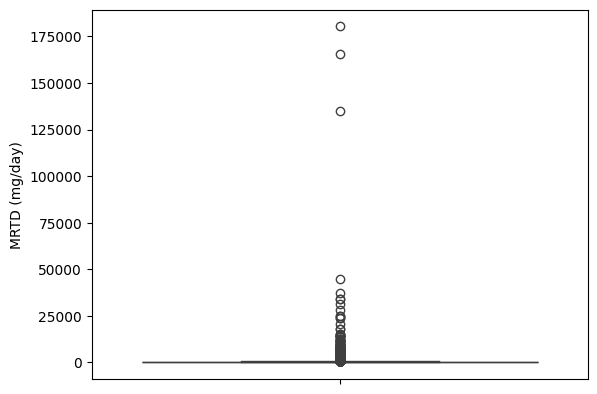

In [35]:
boxplot = sns.boxplot(data=finalDf['MRTD (mg/day)'])

In [ ]:
outliers = boxplot_stats(finalDf["MRTD (mg/day)"]).pop(0)['fliers']

dropIndex1 = np.where(finalDf["MRTD (mg/day)"].isin(outliers))[0]
print(len(dropIndex1))

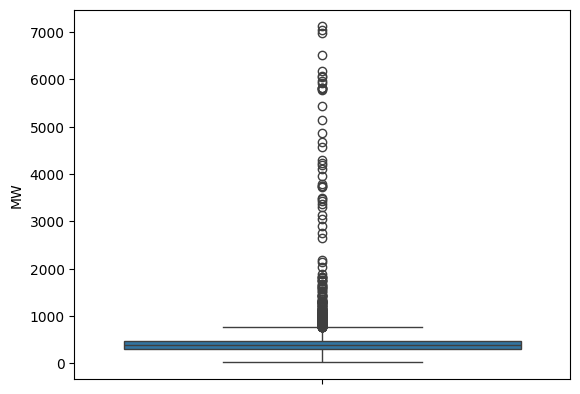

In [37]:
outliers2 = sns.boxplot(data=finalDf['MW'])

In [ ]:
outliers2 = boxplot_stats(finalDf["MW"]).pop(0)['fliers']

dropIndex2 = np.where(finalDf["MW"].isin(outliers2))[0]
print(len(dropIndex2))

In [ ]:
dropIndexes = np.concatenate ((dropIndex1,dropIndex2), axis=0)
print(len(dropIndexes))

767


In [ ]:
#finalDf.drop(dropIndexes, axis=0,  inplace=True) - Foi feita uma variação da base removendo outliers de valores nas propriedades numéricas. 

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = finalDf.columns
finalDf = pd.DataFrame(scaler.fit_transform(finalDf), columns=columns)

In [ ]:
finalDf.info()

<Axes: >

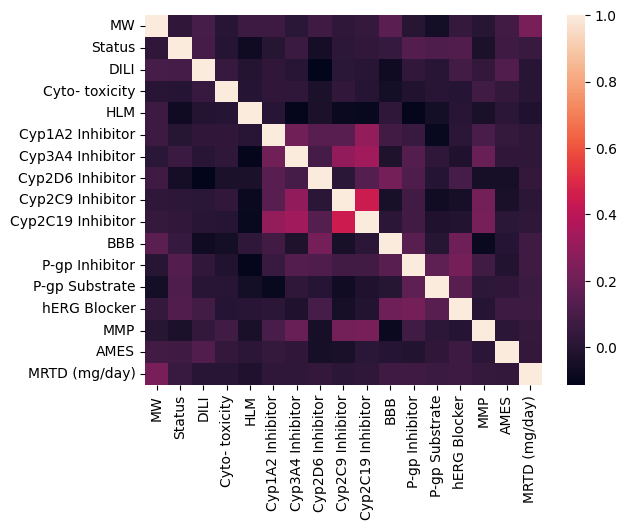

In [31]:
sns.heatmap(finalDf.corr())

In [34]:
finalDf.Status.value_counts()

Status
1.0    1964
0.0    1669
Name: count, dtype: int64

<Axes: xlabel='MW', ylabel='BBB'>

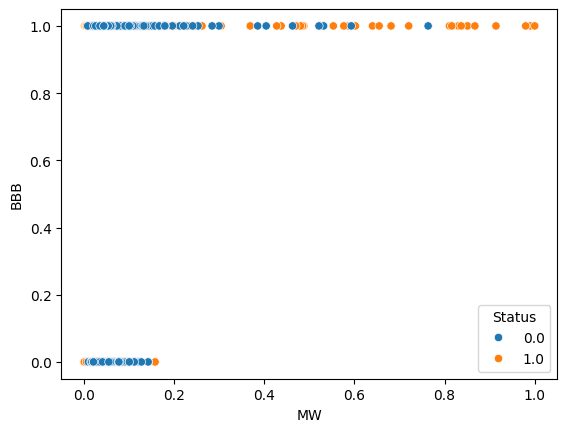

In [39]:
sns.scatterplot(x="MW", y="BBB", hue="Status", data=finalDf)

In [49]:
finalDf.to_csv('baseE&PFinal.csv', index=False)